In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import joblib
# from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [31]:
dataset=pd.read_csv(r'C:\Users\adity\OneDrive\Desktop\heart-disease.csv')
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
clean_dataset = dataset.dropna()
clean_dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [11]:
dataset=pd.read_csv(r'C:\Users\adity\OneDrive\Desktop\heart-disease.csv')
dataset.shape

(303, 14)

In [12]:
# correlation
dataset.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

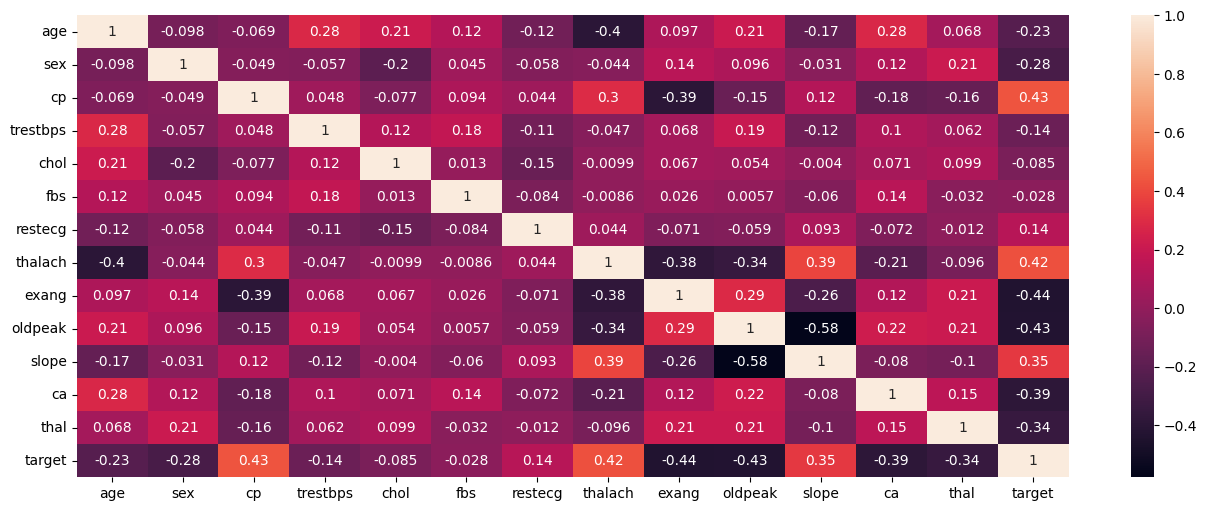

In [13]:
# Correlation heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(dataset.corr(), annot=True)

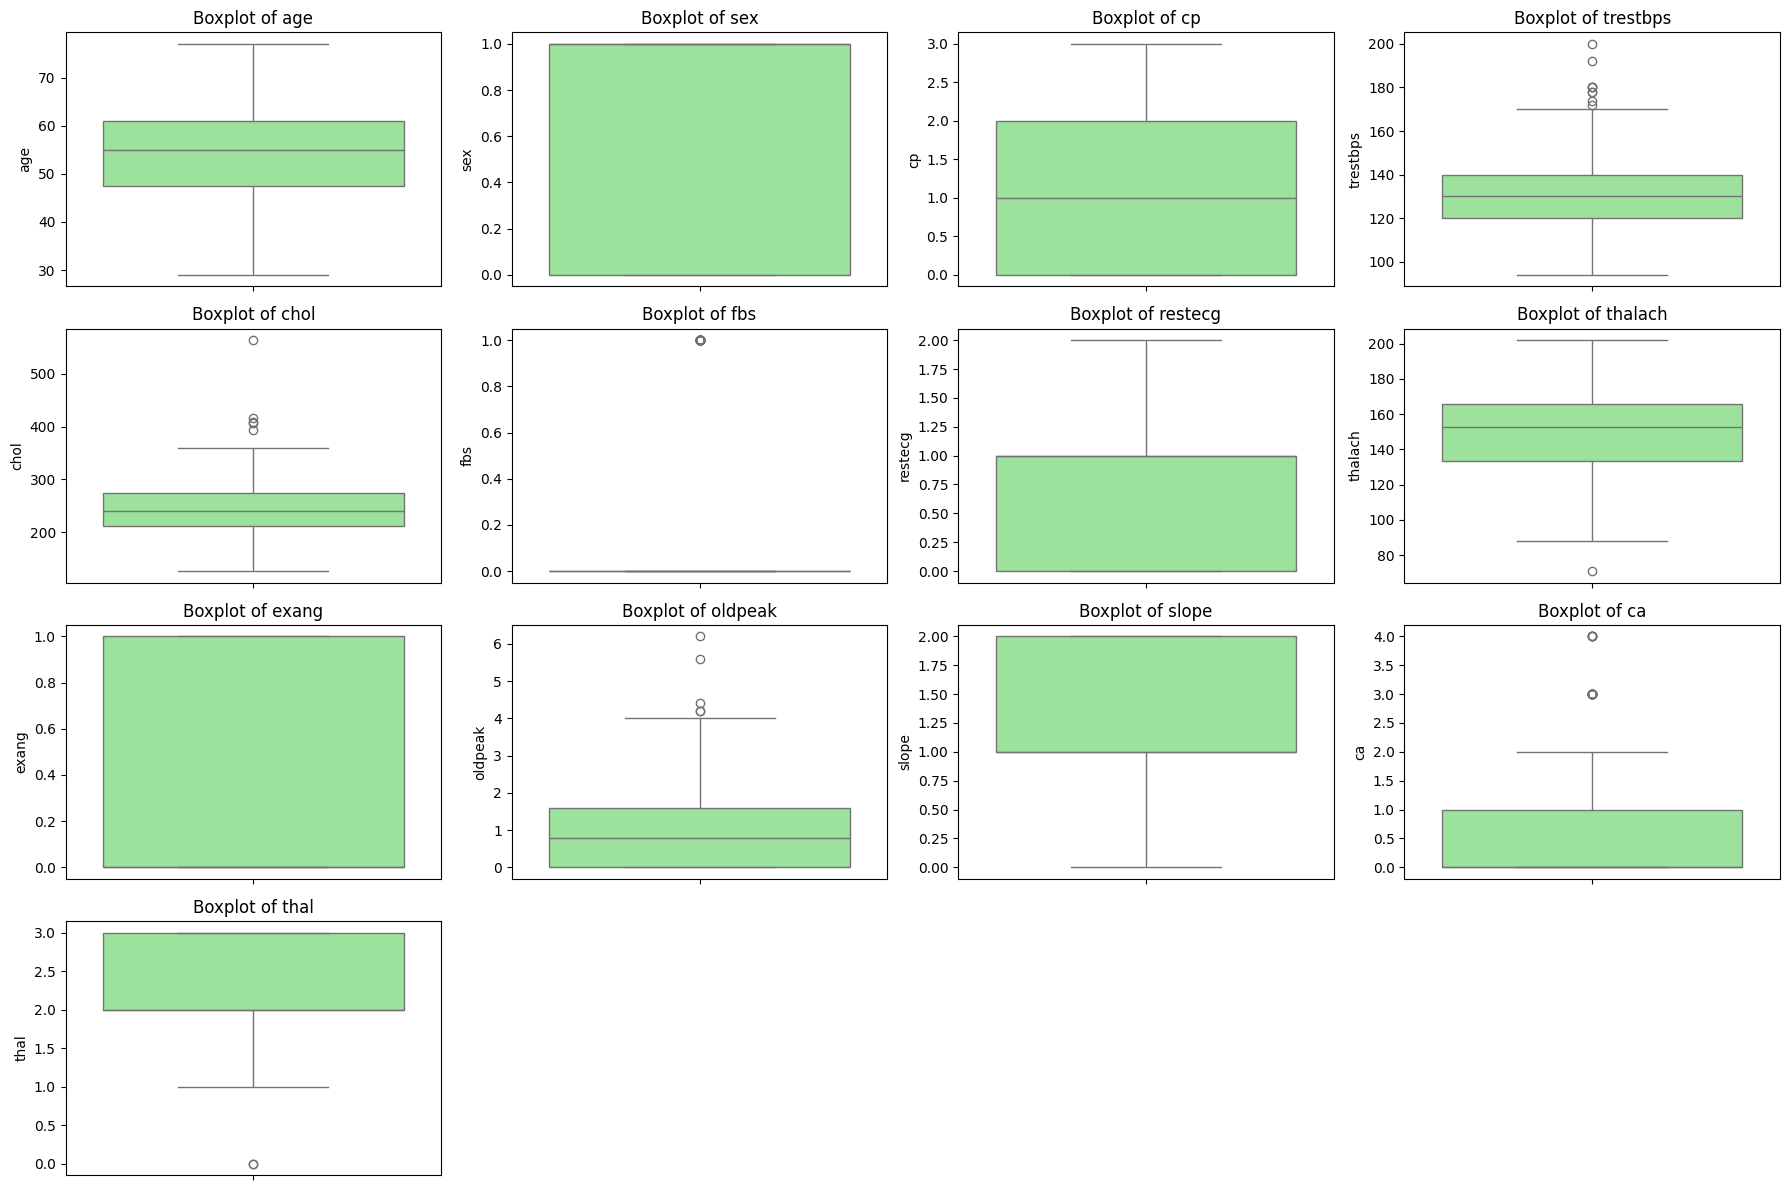

In [14]:
plt.figure(figsize=(18, 12))
for i, column in enumerate(dataset.drop('target', axis=1).columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=dataset[column], color='lightgreen')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [15]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: xlabel='target', ylabel='count'>

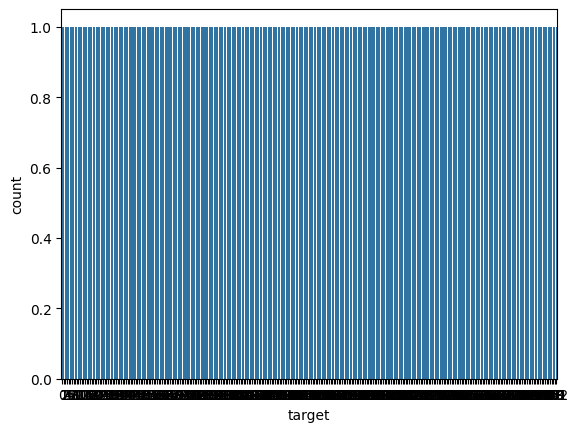

In [16]:
plt.xlabel("target")
plt.ylabel("count")
sns.countplot(dataset['target'])

In [17]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

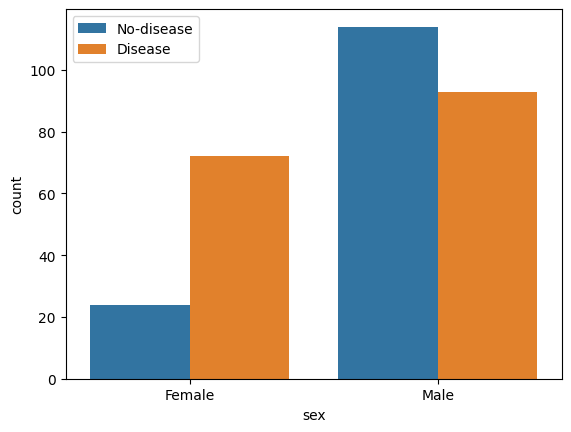

In [91]:
sns.countplot(data=dataset, x=dataset['sex'], hue=dataset['target'])
plt.xticks([0,1],['Female', 'Male'])
plt.legend(labels=['No-disease', 'Disease'])
plt.show()

C:\Users\adity\AppData\Local\Temp\ipykernel_15132\903588402.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['age'], bins=20)


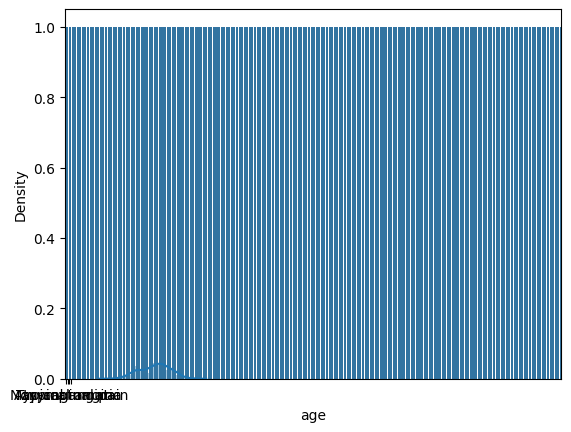

In [94]:
sns.distplot(dataset['age'], bins=20)
sns.countplot(dataset['cp'])
plt.xticks([0,1,2,3], ["Typical angina", "Atypical angina", "Non-anginal pain", "asymptomatic"])
plt.show()

In [95]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: >

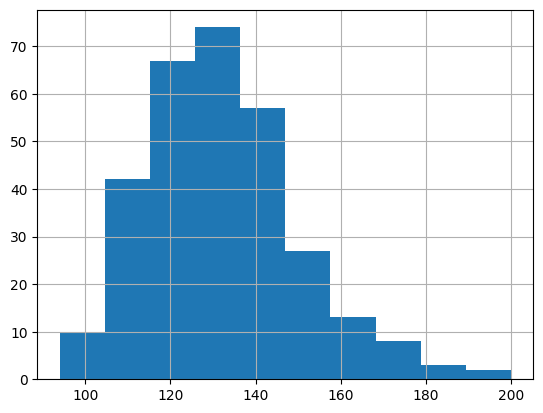

In [18]:
dataset['trestbps'].hist()

<Axes: >

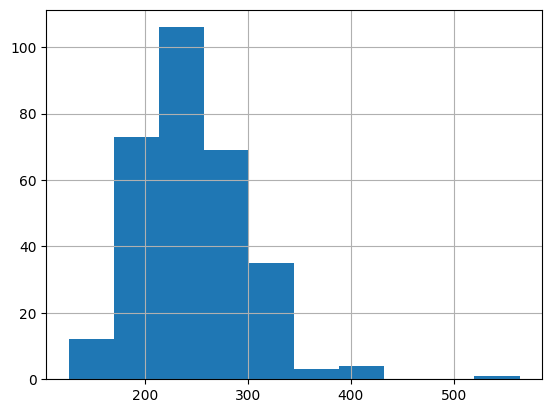

In [98]:
dataset['chol'].hist()

<Axes: >

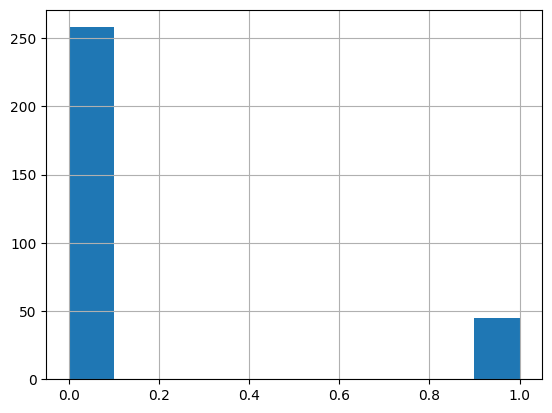

In [99]:
dataset['fbs'].hist()

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = dataset.drop('target', axis=1)
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [20]:
model = LogisticRegression().fit(X_train, y_train)

C:\Users\adity\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


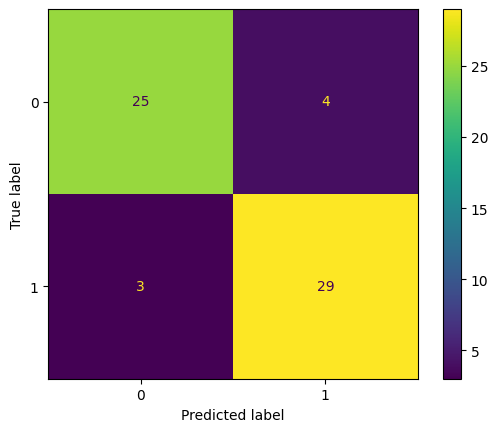

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()


In [34]:
X = dataset.drop('target', axis=1)
y = dataset['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

os.makedirs("model", exist_ok=True)
joblib.dump(scaler, 'model/scaler.pkl')
print("💾 Scaler saved as model/scaler.pkl")

💾 Scaler saved as model/scaler.pkl


In [35]:

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [38]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

C:\Users\adity\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16,
                    validation_split=0.2, verbose=1)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.4249 - loss: 0.7601 - val_accuracy: 0.3265 - val_loss: 0.8538
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5233 - loss: 0.7265 - val_accuracy: 0.3673 - val_loss: 0.8205
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5855 - loss: 0.6995 - val_accuracy: 0.5102 - val_loss: 0.7900
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6269 - loss: 0.6753 - val_accuracy: 0.5714 - val_loss: 0.7642
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6891 - loss: 0.6517 - val_accuracy: 0.5918 - val_loss: 0.7424
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7047 - loss: 0.6286 - val_accuracy: 0.5918 - val_loss: 0.7254
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7358 - loss: 0.6040 - val_accuracy: 0.5918 - val_loss: 0.7053
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7358 - loss: 0.5833 - val_accuracy: 0.6122 - v

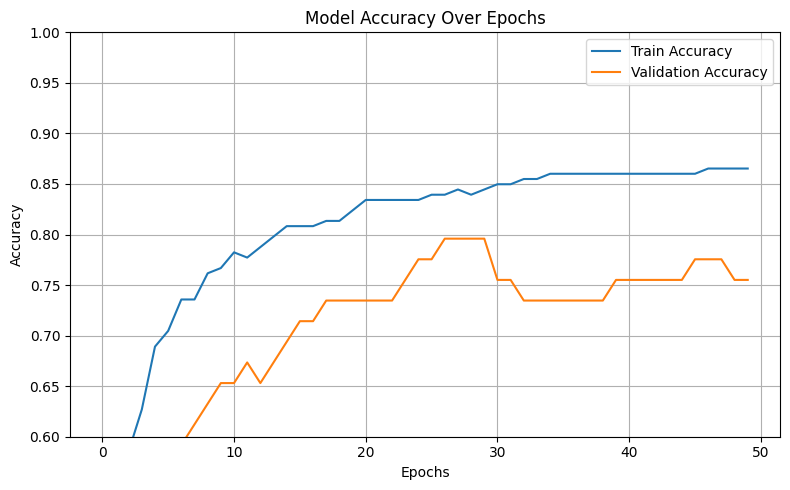

In [40]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.ylim(0.6, 1.0)
plt.tight_layout()
plt.show()

In [41]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

print("\n Test Accuracy:", accuracy_score(y_test, y_pred_classes))
print("\n Classification Report:\n", classification_report(y_test, y_pred_classes))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step

 Test Accuracy: 0.8524590163934426

 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [47]:
model.save("heart_disease_model.h5")
print("💾 Model saved as heart_disease_model.h5")

💾 Model saved as heart_disease_model.h5


# def predict_manual():
    print("\n🔍 Enter patient details to predict heart disease:")
    input_data = []

    feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol',
                     'fbs', 'restecg', 'thalach', 'exang',
                     'oldpeak', 'slope', 'ca', 'thal']

    for feature in feature_names:
        while True:
            try:
                value = float(input(f"Enter {feature}: "))
                input_data.append(value)
                break
            except ValueError:
                print("Please enter a valid number.")

    input_array = np.array(input_data).reshape(1, -1)
    input_scaled = scaler.transform(input_array)

    prediction = model.predict(input_scaled)
    result = "💔 High risk of heart disease" if prediction[0][0] > 0.5 else "❤️ Low risk of heart disease"

    print(f"\nPrediction: {result} (Confidence: {prediction[0][0]:.2f})")

predict_manual()

In [49]:
print("\n🔍 Enter patient details to predict heart disease:")
input_data = []

feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol',
                 'fbs', 'restecg', 'thalach', 'exang',
                 'oldpeak', 'slope', 'ca', 'thal']

for feature in feature_names:
    while True:
        try:
            value = float(input(f"Enter {feature}: "))
            input_data.append(value)
            break
        except ValueError:
            print("Please enter a valid number.")

input_array = np.array(input_data).reshape(1, -1)
input_scaled = scaler.transform(input_array)

prediction = model.predict(input_scaled)
result = "💔 High risk of heart disease" if prediction[0][0] > 0.5 else "❤️ Low risk of heart disease"

print(f"\nPrediction: {result} (Confidence: {prediction[0][0]:.2f})")
predict_manual()


🔍 Enter patient details to predict heart disease:


Enter age:  32
Enter sex:  1
Enter cp:  3
Enter trestbps:  130
Enter chol:  125
Enter fbs:  1
Enter restecg:  0
Enter thalach:  150
Enter exang:  0
Enter oldpeak:  2.3
Enter slope:  0
Enter ca:  0
Enter thal:  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


C:\Users\adity\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Prediction: 💔 High risk of heart disease (Confidence: 0.97)

🔍 Enter patient details to predict heart disease:


Enter age:  0
Enter sex:  0
Enter cp:  1
Enter trestbps:  1
Enter chol:  13
Enter fbs:  0
Enter restecg:  145
Enter thalach:  134
Enter exang:  0
Enter oldpeak:  2.2
Enter slope:  0
Enter ca:  0
Enter thal:  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step

Prediction: 💔 High risk of heart disease (Confidence: 1.00)


C:\Users\adity\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [50]:
import streamlit as st
import joblib
joblib.dump(model, "Heart disease.pkl")

['Heart disease.pkl']

In [51]:
model = joblib.load("Heart disease.pkl")

In [52]:
import streamlit as st
import joblib
# import numpy as np

# Load model
model = joblib.load("Heart disease.pkl")

st.title("Heart Disease Prediction App")
st.write("Enter the patient details below:")

# Example inputs (customize according to your dataset)
age = st.number_input("Age", min_value=1, max_value=120, value=50)
sex = st.selectbox("Sex", ["Male", "Female"])
cp = st.selectbox("Chest Pain Type (cp)", [0, 1, 2, 3])
trestbps = st.number_input("Resting Blood Pressure (trestbps)", value=120)
chol = st.number_input("Serum Cholesterol (chol)", value=200)
fbs = st.selectbox("Fasting Blood Sugar > 120 mg/dl", [0, 1])
restecg = st.selectbox("Resting ECG (restecg)", [0, 1, 2])
thalach = st.number_input("Max Heart Rate Achieved (thalach)", value=150)
exang = st.selectbox("Exercise Induced Angina", [0, 1])

# Convert gender to numeric
sex = 1 if sex == "Male" else 0

# Predict
if st.button("Predict"):
    input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang]])
    prediction = model.predict(input_data)
    result = "Positive (High Risk)" if prediction[0] == 1 else "Negative (Low Risk)"
    st.subheader(f"Prediction: {result}")


2025-07-31 12:14:43.961 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 12:14:43.962 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 12:14:43.962 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 12:14:43.963 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 12:14:43.964 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 12:14:43.965 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 12:14:43.966 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 12:14:43.966 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar